In [ ]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()

if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')

print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt # To create and display visualizations
import pandas as pd # To perform dataframe operations
import numpy as np # For working with arrays
import os # To interact with operating system for folder/directory manipulation
import random # To generate random numbers
from matplotlib.image import imread # To read and display images
import cv2 # For computer vision tasks
import keras # For implementing neural networks
from keras.preprocessing.image import ImageDataGenerator # To perform data augmentation

In [ ]:
# Defining data directories
train_path = '/content/drive/MyDrive/Colab Notebooks/DL/Traffic Sign/Train'
valid_path = '/content/drive/MyDrive/Colab Notebooks/DL/Traffic Sign/Validation'
test_path = '/content/drive/MyDrive/Colab Notebooks/DL/Traffic Sign/Test'

In [ ]:
num_classes = len(os.listdir(train_path))
print(f"Number of classes: {num_classes}")

Number of classes: 43


In [ ]:
# Defining a dictionary that maps numerical labels to description of traffic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

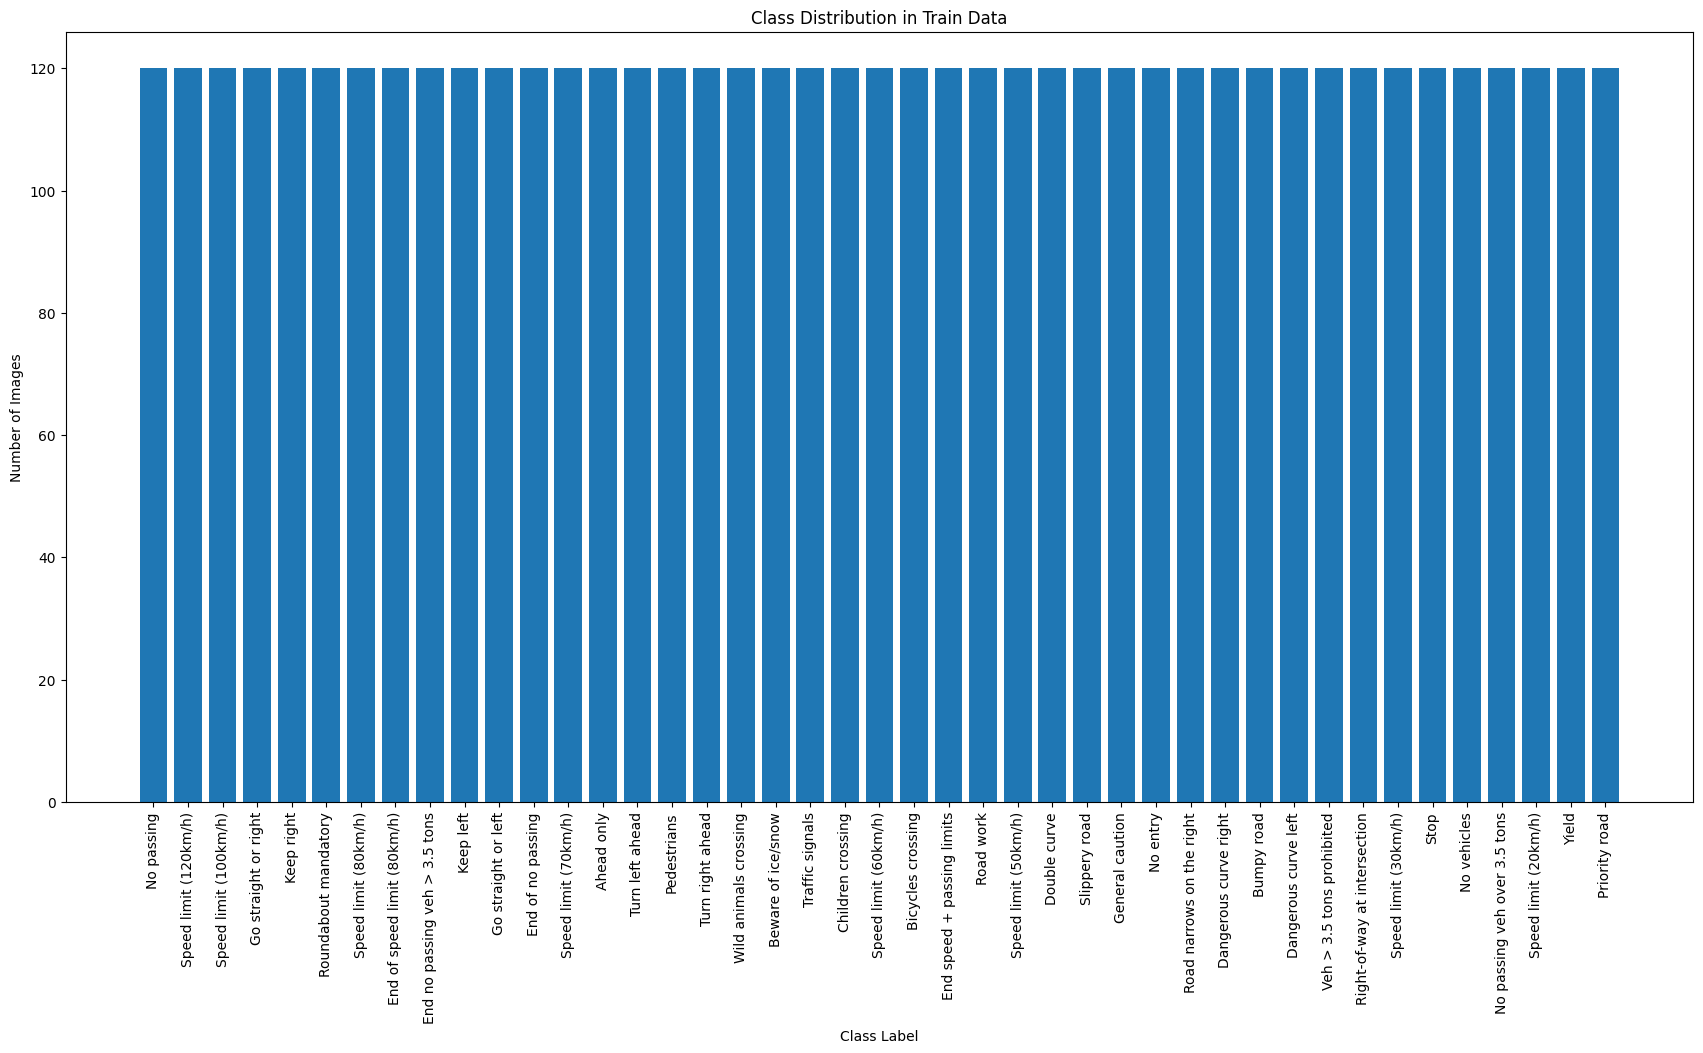

In [ ]:
# Plotting class distribution in train data

# Listing subfolders (representing different classes) in the 'train_path' directory
folders = os.listdir(train_path)

# Creating empty lists to store image counts of each class and corresponding class names
num_class_train = []
class_names = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder) # Listing image files in the 'train_path' directory
    num_class_train.append(len(train_files)) # Appending image counts of each class to the num_class_train list
    class_names.append(classes[int(folder)])  # Appending corresponding class names to the class_name list

# Plotting class names against image counts
plt.figure(figsize=(21,10))
plt.bar(class_names, num_class_train)
plt.xticks(rotation='vertical')
plt.title("Class Distribution in Train Data")
plt.xlabel("Class Label")
plt.ylabel("Number of Images")
plt.show()

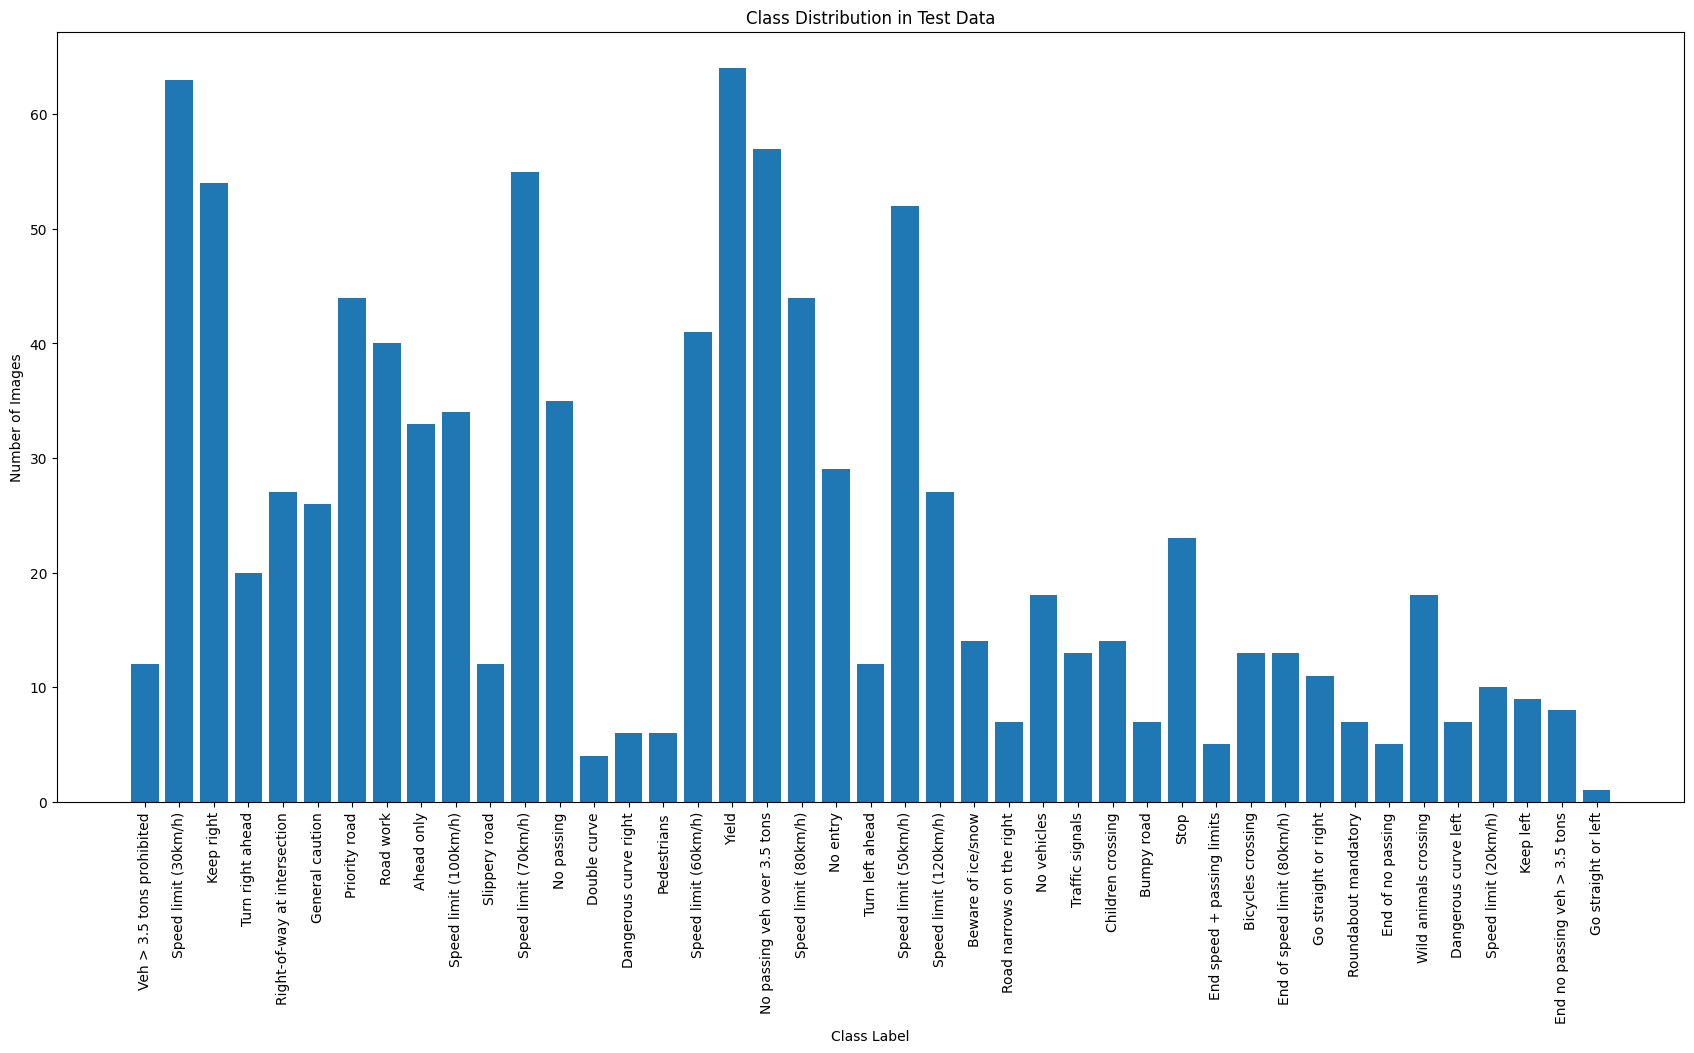

In [ ]:
# Plotting class distribution in test data

# Reading the CSV file that contains class labels and image file paths
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL/Traffic Sign/Test.csv')

# Converting "ClassId" column to string type
df['ClassId'] = df['ClassId'].astype(str)

# Removing the directory path from the "Path" column
df['Path'] = df['Path'].str.replace('Test/', '')

# Getting a list of class names
class_names = [classes[int(class_id)] for class_id in df['ClassId']]

# Counting the number of test images in each class
num_class_test = {}
for class_name in class_names:
    if class_name in num_class_test:
        num_class_test[class_name] += 1
    else:
        num_class_test[class_name] = 1

# Plotting class names against image counts for test images
plt.figure(figsize=(21,10))
plt.bar(num_class_test.keys(), num_class_test.values())
plt.xticks(rotation='vertical')
plt.title("Class Distribution in Test Data")
plt.xlabel("Class Label")
plt.ylabel("Number of Images")
plt.show()

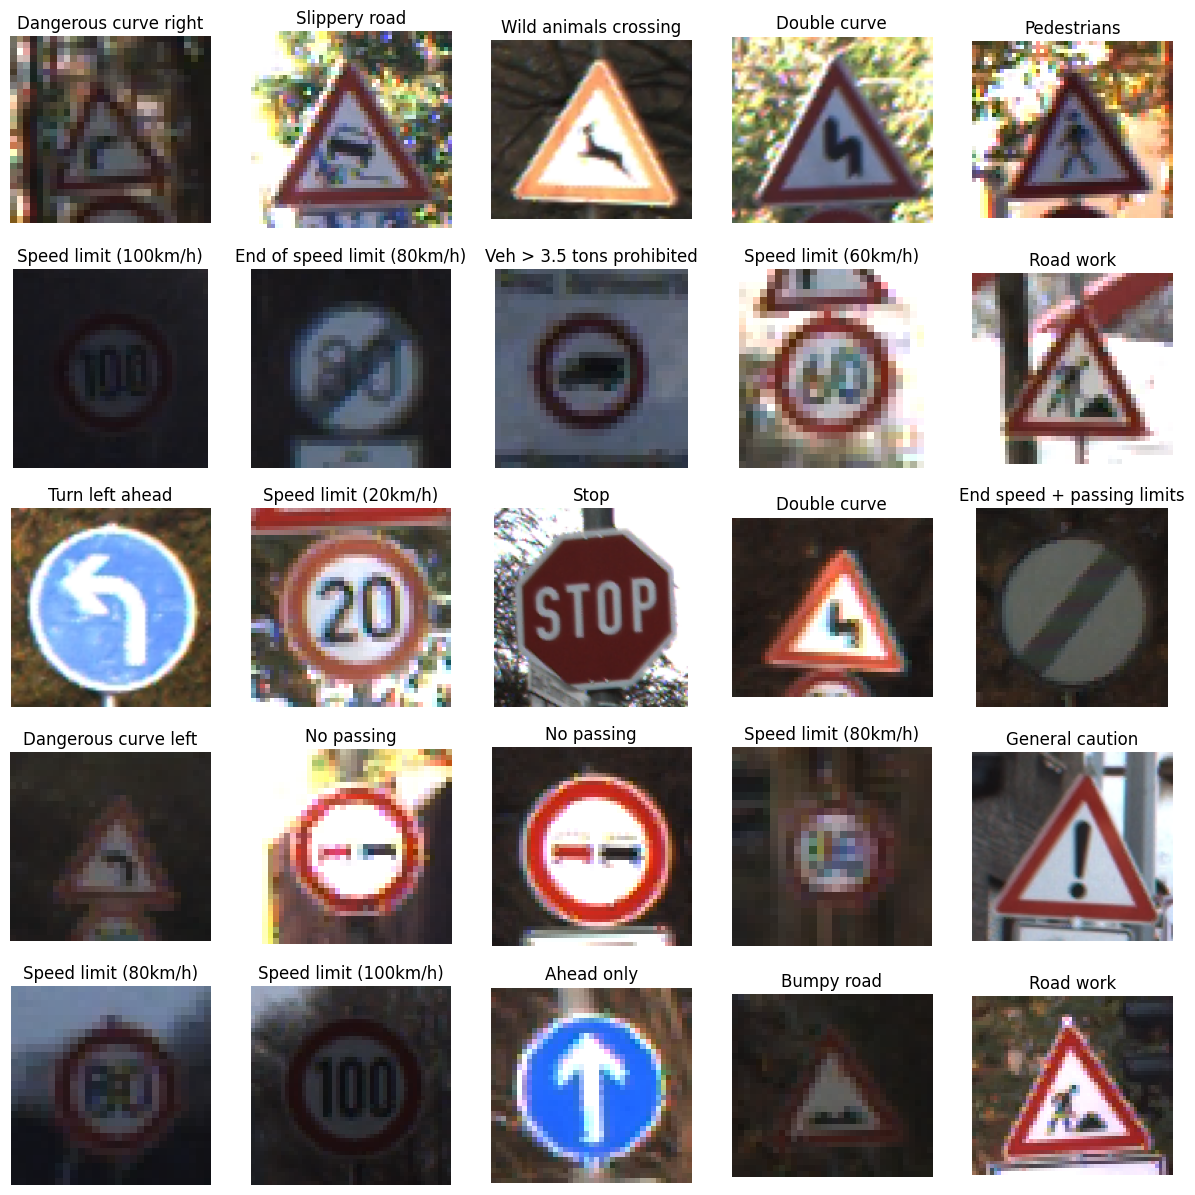

In [ ]:
# Defining function to display random images and their corresponding labels
def display_random_train_images(train_path, classes, num_images=25):
    plt.figure(figsize=(15, 15))

    for i in range(num_images):
        # Randomly selecting a class
        class_idx = random.randint(0, len(classes) - 1) # Random selection of numerical class labels
        label = classes[class_idx] # Retrieving description associated with the numerical class labels

        # Obtaining a random image from the selected class
        class_dir = os.path.join(train_path, str(class_idx)) # Creating a path to store images of the selected class
        image_files = os.listdir(class_dir) # Listing image files of the selected class
        image_name = random.choice(image_files) # Random selection of an image file from the list
        image_path = os.path.join(class_dir, image_name) # Creating a path to store image that will be displayed

        # Loading and displaying the image
        image = cv2.imread(image_path)
        plt.subplot(5, 5, i + 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(label)
        plt.axis('off')

    plt.show()

# Calling the function to display 25 random images with corresponding labels
display_random_train_images(train_path, classes, num_images=25)

In [ ]:
datagen = ImageDataGenerator(rotation_range=10,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1,
                             zoom_range=0.2,
                             rescale=1./255)

train_generator = datagen.flow_from_directory(train_path,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=True,
                                              seed=42,
                                              color_mode='rgb')

# Reading the CSV file that contains class labels and image file paths
df_valid = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL/Traffic Sign/Validation.csv')

# Converting "ClassId" column to string type
df_valid['ClassId'] = df_valid['ClassId'].astype(str)

# Removing the directory path from the "Path" column
df_valid['Path'] = df_valid['Path'].str.replace('Valid/', '')

# Using flow_from_dataframe to load and preprocess validation images with labels
val_generator = datagen.flow_from_dataframe(
                dataframe=df_valid,
                directory=valid_path,
                x_col='Path',              # Column with image file paths
                y_col='ClassId',           # Column with class labels
                target_size=(224, 224),
                batch_size=32,
                class_mode='categorical',
                shuffle=True,
                seed=42,
                color_mode='rgb')

Found 5160 images belonging to 43 classes.
Found 3000 validated image filenames belonging to 43 classes.


In [ ]:
x, y = next(train_generator)
print("x", type(x))
print("y", type(y))
print("x", x.shape)
print("y", y.shape)

x <class 'numpy.ndarray'>
y <class 'numpy.ndarray'>
x (32, 224, 224, 3)
y (32, 43)


**EXPERIMENTATION WITH VGG_16**

**1) VGG_16 as feature extractor**

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import BatchNormalization, Dropout
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# Loading the pre-trained VGG16 model with the final classification layer (top layer) excluded
vgg16_pretrained = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
for layer in vgg16_pretrained.layers:
    layer.trainable = False

vgg16_pretrained_layers = [(layer, layer.name, layer.trainable) for layer in vgg16_pretrained.layers]
pd.DataFrame(vgg16_pretrained_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.engine.input_layer.InputLayer objec...,input_1,False
1,<keras.src.layers.convolutional.conv2d.Conv2D ...,block1_conv1,False
2,<keras.src.layers.convolutional.conv2d.Conv2D ...,block1_conv2,False
3,<keras.src.layers.pooling.max_pooling2d.MaxPoo...,block1_pool,False
4,<keras.src.layers.convolutional.conv2d.Conv2D ...,block2_conv1,False
5,<keras.src.layers.convolutional.conv2d.Conv2D ...,block2_conv2,False
6,<keras.src.layers.pooling.max_pooling2d.MaxPoo...,block2_pool,False
7,<keras.src.layers.convolutional.conv2d.Conv2D ...,block3_conv1,False
8,<keras.src.layers.convolutional.conv2d.Conv2D ...,block3_conv2,False
9,<keras.src.layers.convolutional.conv2d.Conv2D ...,block3_conv3,False


In [ ]:
# Building the VGG16 model
vgg16_fe = keras.models.Sequential()
vgg16_fe.add(vgg16_pretrained)
# Adding custom layers
vgg16_fe.add(Flatten(name='flattened'))
vgg16_fe.add(BatchNormalization(name='batch_norm1'))
vgg16_fe.add(Dropout(0.5, name='dropout1'))
vgg16_fe.add(Dense(128, activation='relu'))
vgg16_fe.add(BatchNormalization(name='batch_norm2'))
vgg16_fe.add(Dropout(0.5, name='dropout2'))
vgg16_fe.add(Dense(43, activation='softmax', name='predictions'))

# Creating an Adam optimizer with a default learning rate of 0.001
adam_optimizer = optimizers.Adam(learning_rate=0.001)

vgg16_fe.compile(loss='categorical_crossentropy',
                 optimizer=adam_optimizer,
                 metrics=['accuracy'])

In [ ]:
vgg16_fe.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flattened (Flatten)         (None, 25088)             0         
                                                                 
 batch_norm1 (BatchNormaliz  (None, 25088)             100352    
 ation)                                                          
                                                                 
 dropout1 (Dropout)          (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 batch_norm2 (BatchNormaliz  (None, 128)               512       
 ation)                                                 

In [ ]:
# Defining EarlyStopping callback
early_stopping = EarlyStopping(
                 monitor='val_loss',
                 patience=5,
                 mode='min',
                 verbose=1)

In [ ]:
# Saving checkpoints using callback in Keras
from keras.callbacks import *
checkpoint_filepath = '/content/drive/My Drive/Colab Notebooks/DL/Traffic Sign/Epochs/epochs:{epoch:03d}-val_accuracy:{val_accuracy:.4f}.hdf5'
vgg16_fe_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_accuracy', save_best_only=False, mode='max', verbose=1)
vgg16_fe_callbacks_list = [vgg16_fe_checkpoint]

In [ ]:
vgg16_fe_history = vgg16_fe.fit(
                   train_generator,
                   epochs=20,
                   validation_data=val_generator,
                   callbacks=[early_stopping, vgg16_fe_callbacks_list])

Epoch 1/20
162/162 [==============================] - ETA: 0s - loss: 2.9490 - accuracy: 0.2585 
Epoch 1: saving model to /content/drive/My Drive/Colab Notebooks/DL/Traffic Sign/Epochs/epochs:001-val_accuracy:0.3337.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


162/162 [==============================] - 4063s 25s/step - loss: 2.9490 - accuracy: 0.2585 - val_loss: 2.5552 - val_accuracy: 0.3337
Epoch 2/20
162/162 [==============================] - ETA: 0s - loss: 1.7248 - accuracy: 0.5207
Epoch 2: saving model to /content/drive/My Drive/Colab Notebooks/DL/Traffic Sign/Epochs/epochs:002-val_accuracy:0.4600.hdf5
162/162 [==============================] - 176s 1s/step - loss: 1.7248 - accuracy: 0.5207 - val_loss: 1.9300 - val_accuracy: 0.4600
Epoch 3/20
162/162 [==============================] - ETA: 0s - loss: 1.3002 - accuracy: 0.6320
Epoch 3: saving model to /content/drive/My Drive/Colab Notebooks/DL/Traffic Sign/Epochs/epochs:003-val_accuracy:0.5040.hdf5
162/162 [==============================] - 140s 864ms/step - loss: 1.3002 - accuracy: 0.6320 - val_loss: 1.6449 - val_accuracy: 0.5040
Epoch 4/20
162/162 [==============================] - ETA: 0s - loss: 1.0719 - accuracy: 0.6932
Epoch 4: saving model to /content/drive/My Drive/Colab Notebook

In [ ]:
# To resume training of remaining epochs in case Colab runtime is disconnected
vgg16_fe.load_weights('/content/drive/My Drive/Colab Notebooks/DL/Traffic Sign/Epochs/epochs:020-val_accuracy:0.6600.hdf5')

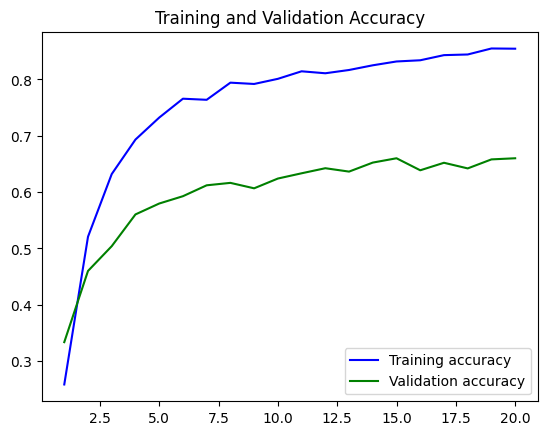

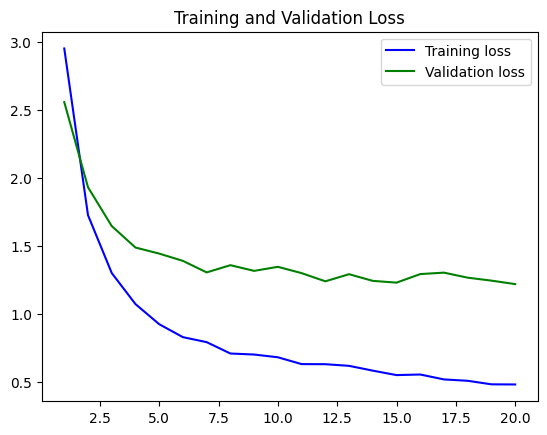

In [ ]:
vgg16_fe_accuracy = vgg16_fe_history.history['accuracy']
vgg16_fe_val_acc = vgg16_fe_history.history['val_accuracy']
vgg16_fe_loss = vgg16_fe_history.history['loss']
vgg16_fe_val_loss = vgg16_fe_history.history['val_loss']

epochs = range(1,len(vgg16_fe_accuracy)+1)

plt.plot(epochs, vgg16_fe_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, vgg16_fe_val_acc, 'g', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, vgg16_fe_loss, 'b', label='Training loss')
plt.plot(epochs, vgg16_fe_val_loss, 'g', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

**2) BLOCK-WISE FINE TUNING OF VGG_16**

In [ ]:
vgg16_pretrained.trainable = True

# Setting the layers in 'block5' to be trainable, and freezing the rest
for layer in vgg16_pretrained.layers:
    if 'block5' in layer.name:
        layer.trainable = True
    else:
        layer.trainable = False

vgg16_pretrained_layers = [(layer, layer.name, layer.trainable) for layer in vgg16_pretrained.layers]
pd.DataFrame(vgg16_pretrained_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.engine.input_layer.InputLayer objec...,input_1,False
1,<keras.src.layers.convolutional.conv2d.Conv2D ...,block1_conv1,False
2,<keras.src.layers.convolutional.conv2d.Conv2D ...,block1_conv2,False
3,<keras.src.layers.pooling.max_pooling2d.MaxPoo...,block1_pool,False
4,<keras.src.layers.convolutional.conv2d.Conv2D ...,block2_conv1,False
5,<keras.src.layers.convolutional.conv2d.Conv2D ...,block2_conv2,False
6,<keras.src.layers.pooling.max_pooling2d.MaxPoo...,block2_pool,False
7,<keras.src.layers.convolutional.conv2d.Conv2D ...,block3_conv1,False
8,<keras.src.layers.convolutional.conv2d.Conv2D ...,block3_conv2,False
9,<keras.src.layers.convolutional.conv2d.Conv2D ...,block3_conv3,False


In [ ]:
# Building the VGG16 model
vgg16_fine_tune_bl5 = keras.models.Sequential()
vgg16_fine_tune_bl5.add(vgg16_pretrained)
# Adding custom layers
vgg16_fine_tune_bl5.add(Flatten(name='flattened'))
vgg16_fine_tune_bl5.add(BatchNormalization(name='batch_norm1'))
vgg16_fine_tune_bl5.add(Dropout(0.5, name='dropout1'))
vgg16_fine_tune_bl5.add(Dense(128, activation='relu'))
vgg16_fine_tune_bl5.add(BatchNormalization(name='batch_norm2'))
vgg16_fine_tune_bl5.add(Dropout(0.5, name='dropout2'))
vgg16_fine_tune_bl5.add(Dense(43, activation='softmax', name='predictions'))

# Creating an Adam optimizer
adam_optimizer = optimizers.Adam(learning_rate=(0.001)/10)

vgg16_fine_tune_bl5.compile(loss='categorical_crossentropy',
                            optimizer=adam_optimizer,
                            metrics='accuracy')

In [ ]:
vgg16_fine_tune_bl5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flattened (Flatten)         (None, 25088)             0         
                                                                 
 batch_norm1 (BatchNormaliz  (None, 25088)             100352    
 ation)                                                          
                                                                 
 dropout1 (Dropout)          (None, 25088)             0         
                                                                 
 dense_1 (Dense)             (None, 128)               3211392   
                                                                 
 batch_norm2 (BatchNormaliz  (None, 128)               512       
 ation)                                               

In [ ]:
# Saving checkpoints using callback in Keras
from keras.callbacks import *
checkpoint_filepath='/content/drive/My Drive/Colab Notebooks/DL/Traffic Sign/Epochs2/epochs:{epoch:03d}-val_accuracy:{val_accuracy:.4f}.hdf5'
vgg16_fine_tune_bl5_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_accuracy', save_best_only=False, mode='max', verbose=1)
vgg16_fine_tune_bl5_callbacks_list = [vgg16_fine_tune_bl5_checkpoint]

In [ ]:
vgg16_fine_tune_bl5_history = vgg16_fine_tune_bl5.fit(
                              train_generator,
                              epochs=20,
                              validation_data=val_generator,
                              callbacks=[early_stopping, vgg16_fine_tune_bl5_callbacks_list])

Epoch 1/20
162/162 [==============================] - ETA: 0s - loss: 3.6687 - accuracy: 0.1429
Epoch 1: saving model to /content/drive/My Drive/Colab Notebooks/DL/Traffic Sign/Epochs2/epochs:001-val_accuracy:0.2780.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


162/162 [==============================] - 136s 809ms/step - loss: 3.6687 - accuracy: 0.1429 - val_loss: 2.7831 - val_accuracy: 0.2780
Epoch 2/20
162/162 [==============================] - ETA: 0s - loss: 2.5590 - accuracy: 0.3153
Epoch 2: saving model to /content/drive/My Drive/Colab Notebooks/DL/Traffic Sign/Epochs2/epochs:002-val_accuracy:0.3590.hdf5
162/162 [==============================] - 130s 803ms/step - loss: 2.5590 - accuracy: 0.3153 - val_loss: 2.3294 - val_accuracy: 0.3590
Epoch 3/20
162/162 [==============================] - ETA: 0s - loss: 1.8295 - accuracy: 0.4979
Epoch 3: saving model to /content/drive/My Drive/Colab Notebooks/DL/Traffic Sign/Epochs2/epochs:003-val_accuracy:0.4547.hdf5
162/162 [==============================] - 143s 885ms/step - loss: 1.8295 - accuracy: 0.4979 - val_loss: 1.9330 - val_accuracy: 0.4547
Epoch 4/20
162/162 [==============================] - ETA: 0s - loss: 1.3978 - accuracy: 0.6166
Epoch 4: saving model to /content/drive/My Drive/Colab No

In [ ]:
# To resume training of remaining epochs in case Colab runtime is disconnected
vgg16_fine_tune_bl5.load_weights("/content/drive/My Drive/Colab Notebooks/DL/Traffic Sign/Epochs2/epochs:020-val_accuracy:0.8563.hdf5")

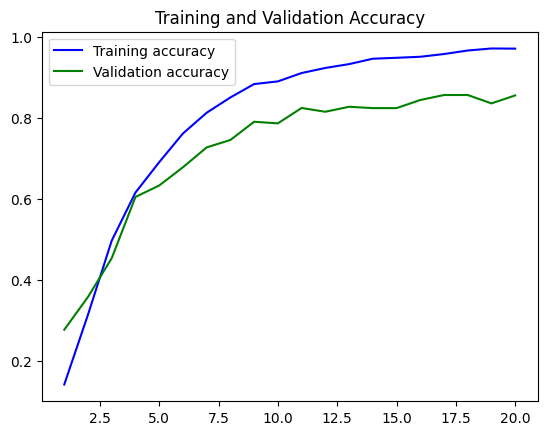

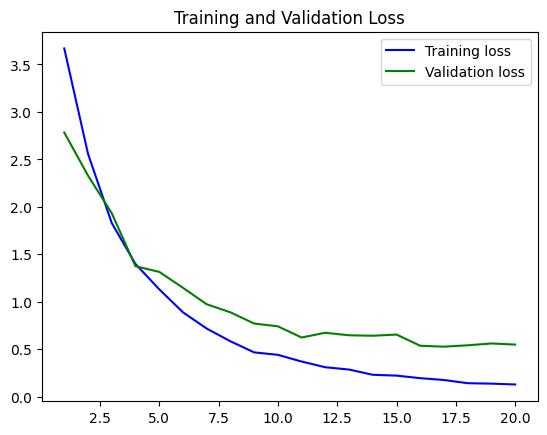

In [ ]:
vgg16_fine_tune_bl5_accuracy = vgg16_fine_tune_bl5_history.history['accuracy']
vgg16_fine_tune_bl5_val_acc = vgg16_fine_tune_bl5_history.history['val_accuracy']
vgg16_fine_tune_bl5_loss = vgg16_fine_tune_bl5_history.history['loss']
vgg16_fine_tune_bl5_val_loss = vgg16_fine_tune_bl5_history.history['val_loss']

epochs = range(1,len(vgg16_fine_tune_bl5_accuracy)+1)

plt.plot(epochs, vgg16_fine_tune_bl5_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, vgg16_fine_tune_bl5_val_acc, 'g', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, vgg16_fine_tune_bl5_loss, 'b', label='Training loss')
plt.plot(epochs, vgg16_fine_tune_bl5_val_loss, 'g', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

**3) LAYER-WISE FINE TUNING OF VGG_16**

In [ ]:
vgg16_pretrained.trainable = True

# Setting the layers in 'block5 conv3' to be trainable, and freezing the rest
set_trainable = False
for layer in vgg16_pretrained.layers:
    if layer.name == 'block5_conv3':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

vgg16_pretrained_layers = [(layer, layer.name, layer.trainable) for layer in vgg16_pretrained.layers]
pd.DataFrame(vgg16_pretrained_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.engine.input_layer.InputLayer objec...,input_1,False
1,<keras.src.layers.convolutional.conv2d.Conv2D ...,block1_conv1,False
2,<keras.src.layers.convolutional.conv2d.Conv2D ...,block1_conv2,False
3,<keras.src.layers.pooling.max_pooling2d.MaxPoo...,block1_pool,False
4,<keras.src.layers.convolutional.conv2d.Conv2D ...,block2_conv1,False
5,<keras.src.layers.convolutional.conv2d.Conv2D ...,block2_conv2,False
6,<keras.src.layers.pooling.max_pooling2d.MaxPoo...,block2_pool,False
7,<keras.src.layers.convolutional.conv2d.Conv2D ...,block3_conv1,False
8,<keras.src.layers.convolutional.conv2d.Conv2D ...,block3_conv2,False
9,<keras.src.layers.convolutional.conv2d.Conv2D ...,block3_conv3,False


In [ ]:
# Building the VGG16 model
vgg16_fine_tune_l3 = keras.models.Sequential()
vgg16_fine_tune_l3.add(vgg16_pretrained)
# Adding custom layers
vgg16_fine_tune_l3.add(Flatten(name='flattened'))
vgg16_fine_tune_l3.add(BatchNormalization(name='batch_norm1'))
vgg16_fine_tune_l3.add(Dropout(0.5, name='dropout1'))
vgg16_fine_tune_l3.add(Dense(128, activation='relu'))
vgg16_fine_tune_l3.add(BatchNormalization(name='batch_norm2'))
vgg16_fine_tune_l3.add(Dropout(0.5, name='dropout2'))
vgg16_fine_tune_l3.add(Dense(43, activation='softmax', name='predictions'))

# Creating an Adam optimizer
adam_optimizer = optimizers.Adam(learning_rate=(0.001)/10)

vgg16_fine_tune_l3.compile(loss='categorical_crossentropy',
                            optimizer=adam_optimizer,
                            metrics='accuracy')

In [ ]:
vgg16_fine_tune_l3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flattened (Flatten)         (None, 25088)             0         
                                                                 
 batch_norm1 (BatchNormaliz  (None, 25088)             100352    
 ation)                                                          
                                                                 
 dropout1 (Dropout)          (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 batch_norm2 (BatchNormaliz  (None, 128)               512       
 ation)                                                 

In [ ]:
# Saving checkpoints using callback in Keras
from keras.callbacks import *
checkpoint_filepath='/content/drive/My Drive/Colab Notebooks/DL/Traffic Sign/Epochs3/epochs:{epoch:03d}-val_accuracy:{val_accuracy:.4f}.hdf5'
vgg16_fine_tune_l3_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_accuracy', save_best_only=False, mode='max', verbose=1)
vgg16_fine_tune_l3_callbacks_list = [vgg16_fine_tune_l3_checkpoint]

In [ ]:
vgg16_fine_tune_l3_history = vgg16_fine_tune_l3.fit(
                              train_generator,
                              epochs=20,
                              validation_data=val_generator,
                              callbacks=[early_stopping, vgg16_fine_tune_l3_callbacks_list])

Epoch 1/20
162/162 [==============================] - ETA: 0s - loss: 3.7089 - accuracy: 0.1264 
Epoch 1: saving model to /content/drive/My Drive/Colab Notebooks/DL/Traffic Sign/Epochs3/epochs:001-val_accuracy:0.2557.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


162/162 [==============================] - 3082s 19s/step - loss: 3.7089 - accuracy: 0.1264 - val_loss: 2.9257 - val_accuracy: 0.2557
Epoch 2/20
162/162 [==============================] - ETA: 0s - loss: 2.5921 - accuracy: 0.3157
Epoch 2: saving model to /content/drive/My Drive/Colab Notebooks/DL/Traffic Sign/Epochs3/epochs:002-val_accuracy:0.3693.hdf5
162/162 [==============================] - 141s 862ms/step - loss: 2.5921 - accuracy: 0.3157 - val_loss: 2.3221 - val_accuracy: 0.3693
Epoch 3/20
162/162 [==============================] - ETA: 0s - loss: 2.0669 - accuracy: 0.4322
Epoch 3: saving model to /content/drive/My Drive/Colab Notebooks/DL/Traffic Sign/Epochs3/epochs:003-val_accuracy:0.4497.hdf5
162/162 [==============================] - 142s 875ms/step - loss: 2.0669 - accuracy: 0.4322 - val_loss: 2.0322 - val_accuracy: 0.4497
Epoch 4/20
162/162 [==============================] - ETA: 0s - loss: 1.6993 - accuracy: 0.5345
Epoch 4: saving model to /content/drive/My Drive/Colab Not

In [ ]:
# To resume training of remaining epochs in case Colab runtime is disconnected
vgg16_fine_tune_l3.load_weights('/content/drive/My Drive/Colab Notebooks/DL/Traffic Sign/Epochs3/epochs:020-val_accuracy:0.7133.hdf5')

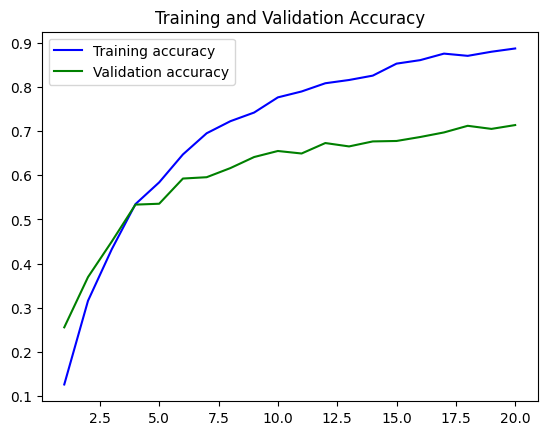

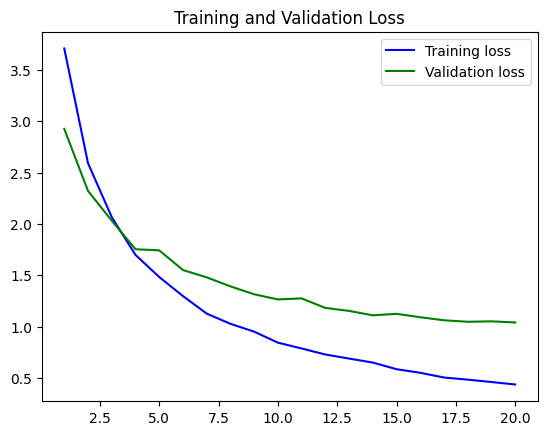

In [ ]:
vgg16_fine_tune_l3_accuracy = vgg16_fine_tune_l3_history.history['accuracy']
vgg16_fine_tune_l3_val_acc = vgg16_fine_tune_l3_history.history['val_accuracy']
vgg16_fine_tune_l3_loss = vgg16_fine_tune_l3_history.history['loss']
vgg16_fine_tune_l3_val_loss = vgg16_fine_tune_l3_history.history['val_loss']

epochs = range(1,len(vgg16_fine_tune_l3_accuracy)+1)

plt.plot(epochs, vgg16_fine_tune_l3_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, vgg16_fine_tune_l3_val_acc, 'g', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, vgg16_fine_tune_l3_loss, 'b', label='Training loss')
plt.plot(epochs, vgg16_fine_tune_l3_val_loss, 'g', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

**HYPERPARAMETER TUNING**

**1) USING RMSPROP AS OPTIMIZER**

In [ ]:
vgg16_pretrained.trainable = True

# Setting the layers in 'block5' to be trainable, and freezing the rest
for layer in vgg16_pretrained.layers:
    if 'block5' in layer.name:
        layer.trainable = True
    else:
        layer.trainable = False

vgg16_pretrained_layers = [(layer, layer.name, layer.trainable) for layer in vgg16_pretrained.layers]
pd.DataFrame(vgg16_pretrained_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.engine.input_layer.InputLayer objec...,input_1,False
1,<keras.src.layers.convolutional.conv2d.Conv2D ...,block1_conv1,False
2,<keras.src.layers.convolutional.conv2d.Conv2D ...,block1_conv2,False
3,<keras.src.layers.pooling.max_pooling2d.MaxPoo...,block1_pool,False
4,<keras.src.layers.convolutional.conv2d.Conv2D ...,block2_conv1,False
5,<keras.src.layers.convolutional.conv2d.Conv2D ...,block2_conv2,False
6,<keras.src.layers.pooling.max_pooling2d.MaxPoo...,block2_pool,False
7,<keras.src.layers.convolutional.conv2d.Conv2D ...,block3_conv1,False
8,<keras.src.layers.convolutional.conv2d.Conv2D ...,block3_conv2,False
9,<keras.src.layers.convolutional.conv2d.Conv2D ...,block3_conv3,False


In [ ]:
# Building the VGG16 model
vgg16_rmsprop = keras.models.Sequential()
vgg16_rmsprop.add(vgg16_pretrained)
# Adding custom layers
vgg16_rmsprop.add(Flatten(name='flattened'))
vgg16_rmsprop.add(BatchNormalization(name='batch_norm1'))
vgg16_rmsprop.add(Dropout(0.5, name='dropout1'))
vgg16_rmsprop.add(Dense(128, activation='relu'))
vgg16_rmsprop.add(BatchNormalization(name='batch_norm2'))
vgg16_rmsprop.add(Dropout(0.5, name='dropout2'))
vgg16_rmsprop.add(Dense(43, activation='softmax', name='predictions'))

# Creating an RMSprop optimizer
from keras.optimizers import RMSprop
rmsprop_optimizer = RMSprop(learning_rate=(0.001)/10)

vgg16_rmsprop.compile(loss='categorical_crossentropy',
                     optimizer=rmsprop_optimizer,
                     metrics=['accuracy'])

In [ ]:
vgg16_rmsprop.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flattened (Flatten)         (None, 25088)             0         
                                                                 
 batch_norm1 (BatchNormaliz  (None, 25088)             100352    
 ation)                                                          
                                                                 
 dropout1 (Dropout)          (None, 25088)             0         
                                                                 
 dense_1 (Dense)             (None, 128)               3211392   
                                                                 
 batch_norm2 (BatchNormaliz  (None, 128)               512       
 ation)                                               

In [ ]:
# Saving checkpoints using callback in Keras
from keras.callbacks import *
checkpoint_filepath='/content/drive/My Drive/Colab Notebooks/DL/Traffic Sign/Epochs4/epochs:{epoch:03d}-val_accuracy:{val_accuracy:.4f}.hdf5'
vgg16_rmsprop_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_accuracy', save_best_only=False, mode='max', verbose=1)
vgg16_rmsprop_callbacks_list = [vgg16_rmsprop_checkpoint]

In [ ]:
vgg16_rmsprop_history = vgg16_rmsprop.fit(
                        train_generator,
                        epochs=20,
                        validation_data=val_generator,
                        callbacks=[early_stopping, vgg16_rmsprop_callbacks_list])

Epoch 1/20
162/162 [==============================] - ETA: 0s - loss: 3.7033 - accuracy: 0.1314
Epoch 1: saving model to /content/drive/My Drive/Colab Notebooks/DL/Traffic Sign/Epochs4/epochs:001-val_accuracy:0.2500.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


162/162 [==============================] - 139s 841ms/step - loss: 3.7033 - accuracy: 0.1314 - val_loss: 2.9682 - val_accuracy: 0.2500
Epoch 2/20
162/162 [==============================] - ETA: 0s - loss: 2.5220 - accuracy: 0.3256
Epoch 2: saving model to /content/drive/My Drive/Colab Notebooks/DL/Traffic Sign/Epochs4/epochs:002-val_accuracy:0.3567.hdf5
162/162 [==============================] - 128s 790ms/step - loss: 2.5220 - accuracy: 0.3256 - val_loss: 2.2928 - val_accuracy: 0.3567
Epoch 3/20
162/162 [==============================] - ETA: 0s - loss: 1.8982 - accuracy: 0.4731
Epoch 3: saving model to /content/drive/My Drive/Colab Notebooks/DL/Traffic Sign/Epochs4/epochs:003-val_accuracy:0.3767.hdf5
162/162 [==============================] - 181s 1s/step - loss: 1.8982 - accuracy: 0.4731 - val_loss: 2.3135 - val_accuracy: 0.3767
Epoch 4/20
162/162 [==============================] - ETA: 0s - loss: 1.4353 - accuracy: 0.6016
Epoch 4: saving model to /content/drive/My Drive/Colab Noteb

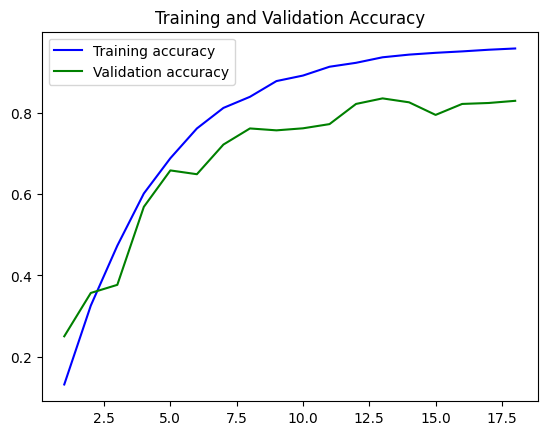

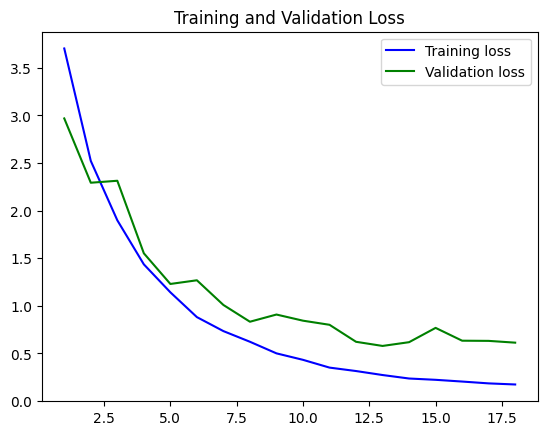

In [ ]:
vgg16_rmsprop_accuracy = vgg16_rmsprop_history.history['accuracy']
vgg16_rmsprop_val_acc = vgg16_rmsprop_history.history['val_accuracy']
vgg16_rmsprop_loss = vgg16_rmsprop_history.history['loss']
vgg16_rmsprop_val_loss = vgg16_rmsprop_history.history['val_loss']

epochs = range(1,len(vgg16_rmsprop_accuracy)+1)

plt.plot(epochs, vgg16_rmsprop_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, vgg16_rmsprop_val_acc, 'g', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, vgg16_rmsprop_loss, 'b', label='Training loss')
plt.plot(epochs, vgg16_rmsprop_val_loss, 'g', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

**2) BEST OPTIMIZER (Adam) + INCREASE BATCH SIZE TO 48**

In [ ]:
vgg16_pretrained.trainable = True

# Setting the layers in 'block5' to be trainable, and freezing the rest
for layer in vgg16_pretrained.layers:
    if 'block5' in layer.name:
        layer.trainable = True
    else:
        layer.trainable = False

vgg16_pretrained_layers = [(layer, layer.name, layer.trainable) for layer in vgg16_pretrained.layers]
pd.DataFrame(vgg16_pretrained_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.engine.input_layer.InputLayer objec...,input_1,False
1,<keras.src.layers.convolutional.conv2d.Conv2D ...,block1_conv1,False
2,<keras.src.layers.convolutional.conv2d.Conv2D ...,block1_conv2,False
3,<keras.src.layers.pooling.max_pooling2d.MaxPoo...,block1_pool,False
4,<keras.src.layers.convolutional.conv2d.Conv2D ...,block2_conv1,False
5,<keras.src.layers.convolutional.conv2d.Conv2D ...,block2_conv2,False
6,<keras.src.layers.pooling.max_pooling2d.MaxPoo...,block2_pool,False
7,<keras.src.layers.convolutional.conv2d.Conv2D ...,block3_conv1,False
8,<keras.src.layers.convolutional.conv2d.Conv2D ...,block3_conv2,False
9,<keras.src.layers.convolutional.conv2d.Conv2D ...,block3_conv3,False


In [ ]:
# Building the VGG16 model
vgg16_batch = keras.models.Sequential()
vgg16_batch.add(vgg16_pretrained)
# Adding custom layers
vgg16_batch.add(Flatten(name='flattened'))
vgg16_batch.add(BatchNormalization(name='batch_norm1'))
vgg16_batch.add(Dropout(0.5, name='dropout1'))
vgg16_batch.add(Dense(128, activation='relu'))
vgg16_batch.add(BatchNormalization(name='batch_norm2'))
vgg16_batch.add(Dropout(0.5, name='dropout2'))
vgg16_batch.add(Dense(43, activation='softmax', name='predictions'))

# Creating an Adam optimizer
adam_optimizer = optimizers.Adam(learning_rate=(0.001)/10)

vgg16_batch.compile(loss='categorical_crossentropy',
                     optimizer=adam_optimizer,
                     metrics=['accuracy'])

In [ ]:
vgg16_batch.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flattened (Flatten)         (None, 25088)             0         
                                                                 
 batch_norm1 (BatchNormaliz  (None, 25088)             100352    
 ation)                                                          
                                                                 
 dropout1 (Dropout)          (None, 25088)             0         
                                                                 
 dense_1 (Dense)             (None, 128)               3211392   
                                                                 
 batch_norm2 (BatchNormaliz  (None, 128)               512       
 ation)                                               

In [ ]:
# Saving checkpoints using callback in Keras
from keras.callbacks import *
checkpoint_filepath='/content/drive/My Drive/Colab Notebooks/DL/Traffic Sign/Epochs6/epochs:{epoch:03d}-val_accuracy:{val_accuracy:.4f}.hdf5'
vgg16_batch_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_accuracy', save_best_only=False, mode='max', verbose=1)
vgg16_batch_callbacks_list = [vgg16_batch_checkpoint]

In [ ]:
batch_size=48

vgg16_batch_history = vgg16_batch.fit(
                      train_generator,
                      epochs=20,
                      batch_size=batch_size,
                      steps_per_epoch=5160/batch_size,
                      validation_data=val_generator,
                      validation_steps=3000/batch_size,
                      callbacks=[early_stopping, vgg16_batch_callbacks_list])

Epoch 1/20
108/107 [==============================] - ETA: 0s - loss: 2.4163 - accuracy: 0.3944
Epoch 1: saving model to /content/drive/My Drive/Colab Notebooks/DL/Traffic Sign/Epochs6/epochs:001-val_accuracy:0.5729.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


107/107 [==============================] - 100s 907ms/step - loss: 2.4163 - accuracy: 0.3944 - val_loss: 1.8416 - val_accuracy: 0.5729
Epoch 2/20
108/107 [==============================] - ETA: 0s - loss: 1.1417 - accuracy: 0.7025
Epoch 2: saving model to /content/drive/My Drive/Colab Notebooks/DL/Traffic Sign/Epochs6/epochs:002-val_accuracy:0.7416.hdf5
107/107 [==============================] - 96s 897ms/step - loss: 1.1417 - accuracy: 0.7025 - val_loss: 1.2587 - val_accuracy: 0.7416
Epoch 3/20
108/107 [==============================] - ETA: 0s - loss: 0.8072 - accuracy: 0.8009
Epoch 3: saving model to /content/drive/My Drive/Colab Notebooks/DL/Traffic Sign/Epochs6/epochs:003-val_accuracy:0.7307.hdf5
107/107 [==============================] - 99s 919ms/step - loss: 0.8072 - accuracy: 0.8009 - val_loss: 1.0796 - val_accuracy: 0.7307
Epoch 4/20
108/107 [==============================] - ETA: 0s - loss: 0.6404 - accuracy: 0.8484
Epoch 4: saving model to /content/drive/My Drive/Colab Note

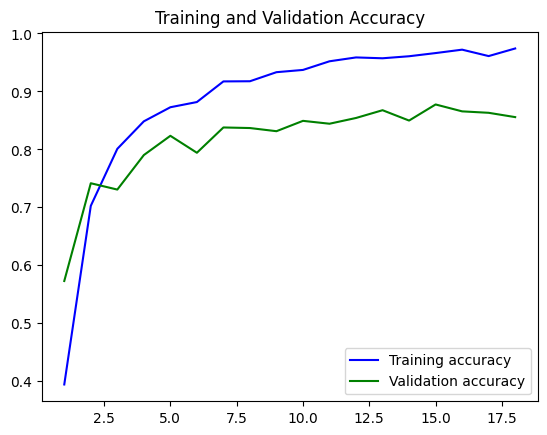

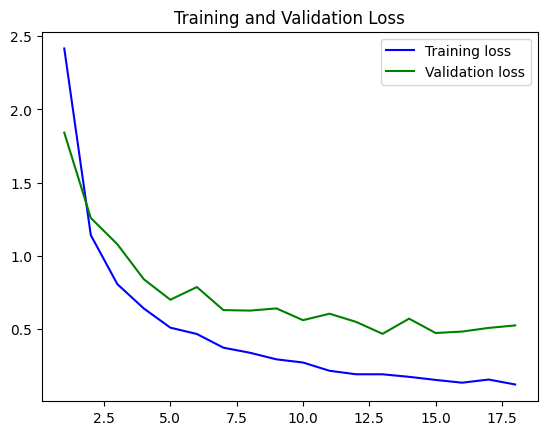

In [ ]:
vgg16_batch_accuracy = vgg16_batch_history.history['accuracy']
vgg16_batch_val_acc = vgg16_batch_history.history['val_accuracy']
vgg16_batch_loss = vgg16_batch_history.history['loss']
vgg16_batch_val_loss = vgg16_batch_history.history['val_loss']

epochs = range(1,len(vgg16_batch_accuracy)+1)

plt.plot(epochs, vgg16_batch_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, vgg16_batch_val_acc, 'g', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, vgg16_batch_loss, 'b', label='Training loss')
plt.plot(epochs, vgg16_batch_val_loss, 'g', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

**3) BEST OPTIMIZER (Adam) + BEST BATCH SIZE (48) + REDUCE LEARNING RATE TO (0.0001/10)**

In [ ]:
vgg16_pretrained.trainable = True

# Setting the layers in 'block5' to be trainable, and freezing the rest
for layer in vgg16_pretrained.layers:
    if 'block5' in layer.name:
        layer.trainable = True
    else:
        layer.trainable = False

vgg16_pretrained_layers = [(layer, layer.name, layer.trainable) for layer in vgg16_pretrained.layers]
pd.DataFrame(vgg16_pretrained_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.engine.input_layer.InputLayer objec...,input_1,False
1,<keras.src.layers.convolutional.conv2d.Conv2D ...,block1_conv1,False
2,<keras.src.layers.convolutional.conv2d.Conv2D ...,block1_conv2,False
3,<keras.src.layers.pooling.max_pooling2d.MaxPoo...,block1_pool,False
4,<keras.src.layers.convolutional.conv2d.Conv2D ...,block2_conv1,False
5,<keras.src.layers.convolutional.conv2d.Conv2D ...,block2_conv2,False
6,<keras.src.layers.pooling.max_pooling2d.MaxPoo...,block2_pool,False
7,<keras.src.layers.convolutional.conv2d.Conv2D ...,block3_conv1,False
8,<keras.src.layers.convolutional.conv2d.Conv2D ...,block3_conv2,False
9,<keras.src.layers.convolutional.conv2d.Conv2D ...,block3_conv3,False


In [ ]:
# Building the VGG16 model
vgg16_lr = keras.models.Sequential()
vgg16_lr.add(vgg16_pretrained)
# Adding custom layers
vgg16_lr.add(Flatten(name='flattened'))
vgg16_lr.add(BatchNormalization(name='batch_norm1'))
vgg16_lr.add(Dropout(0.5, name='dropout1'))
vgg16_lr.add(Dense(128, activation='relu'))
vgg16_lr.add(BatchNormalization(name='batch_norm2'))
vgg16_lr.add(Dropout(0.5, name='dropout2'))
vgg16_lr.add(Dense(43, activation='softmax', name='predictions'))

# Creating an Adam optimizer
adam_optimizer = optimizers.Adam(learning_rate=(0.0001)/10)

vgg16_lr.compile(loss='categorical_crossentropy',
                     optimizer=adam_optimizer,
                     metrics=['accuracy'])

In [ ]:
vgg16_lr.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flattened (Flatten)         (None, 25088)             0         
                                                                 
 batch_norm1 (BatchNormaliz  (None, 25088)             100352    
 ation)                                                          
                                                                 
 dropout1 (Dropout)          (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               3211392   
                                                                 
 batch_norm2 (BatchNormaliz  (None, 128)               512       
 ation)                                               

In [ ]:
# Saving checkpoints using callback in Keras
from keras.callbacks import *
checkpoint_filepath='/content/drive/My Drive/Colab Notebooks/DL/Traffic Sign/Epochs7/epochs:{epoch:03d}-val_accuracy:{val_accuracy:.4f}.hdf5'
vgg16_lr_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_accuracy', save_best_only=False, mode='max', verbose=1)
vgg16_lr_callbacks_list = [vgg16_lr_checkpoint]

In [ ]:
batch_size=48

vgg16_lr_history = vgg16_lr.fit(
                   train_generator,
                   epochs=20,
                   batch_size=batch_size,
                   steps_per_epoch=5160/batch_size,
                   validation_data=val_generator,
                   validation_steps=3000/batch_size,
                   callbacks=[early_stopping, vgg16_lr_callbacks_list])

Epoch 1/20
108/107 [==============================] - ETA: 0s - loss: 4.3531 - accuracy: 0.0664
Epoch 1: saving model to /content/drive/My Drive/Colab Notebooks/DL/Traffic Sign/Epochs7/epochs:001-val_accuracy:0.1999.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


107/107 [==============================] - 100s 906ms/step - loss: 4.3531 - accuracy: 0.0664 - val_loss: 3.3774 - val_accuracy: 0.1999
Epoch 2/20
108/107 [==============================] - ETA: 0s - loss: 3.0561 - accuracy: 0.2217
Epoch 2: saving model to /content/drive/My Drive/Colab Notebooks/DL/Traffic Sign/Epochs7/epochs:002-val_accuracy:0.4826.hdf5
107/107 [==============================] - 87s 816ms/step - loss: 3.0561 - accuracy: 0.2217 - val_loss: 2.6288 - val_accuracy: 0.4826
Epoch 3/20
108/107 [==============================] - ETA: 0s - loss: 2.2534 - accuracy: 0.3922
Epoch 3: saving model to /content/drive/My Drive/Colab Notebooks/DL/Traffic Sign/Epochs7/epochs:003-val_accuracy:0.6533.hdf5
107/107 [==============================] - 98s 918ms/step - loss: 2.2534 - accuracy: 0.3922 - val_loss: 1.9218 - val_accuracy: 0.6533
Epoch 4/20
108/107 [==============================] - ETA: 0s - loss: 1.7436 - accuracy: 0.5323
Epoch 4: saving model to /content/drive/My Drive/Colab Note

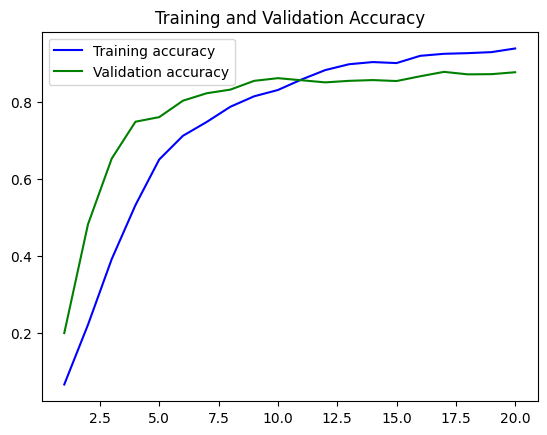

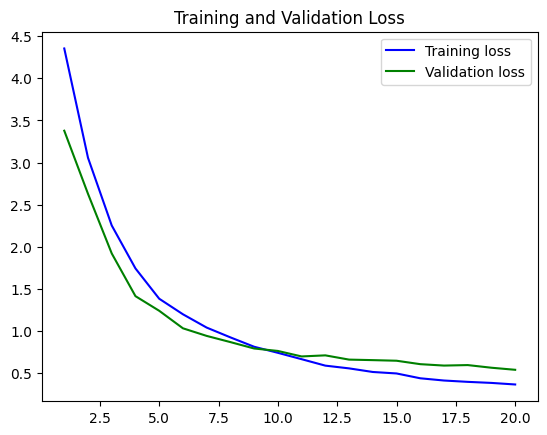

In [ ]:
vgg16_lr_accuracy = vgg16_lr_history.history['accuracy']
vgg16_lr_val_acc = vgg16_lr_history.history['val_accuracy']
vgg16_lr_loss = vgg16_lr_history.history['loss']
vgg16_lr_val_loss = vgg16_lr_history.history['val_loss']

epochs = range(1,len(vgg16_lr_accuracy)+1)

plt.plot(epochs, vgg16_lr_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, vgg16_lr_val_acc, 'g', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, vgg16_lr_loss, 'b', label='Training loss')
plt.plot(epochs, vgg16_lr_val_loss, 'g', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

**4) BEST OPTIMIZER (Adam) + BEST BATCH SIZE (48) + BEST LEARNING RATE (0.0001/10) + INCREASE DROPOUT RATE TO 0.6**

In [ ]:
vgg16_pretrained.trainable = True

# Setting the layers in 'block5' to be trainable, and freezing the rest
for layer in vgg16_pretrained.layers:
    if 'block5' in layer.name:
        layer.trainable = True
    else:
        layer.trainable = False

vgg16_pretrained_layers = [(layer, layer.name, layer.trainable) for layer in vgg16_pretrained.layers]
pd.DataFrame(vgg16_pretrained_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.engine.input_layer.InputLayer objec...,input_1,False
1,<keras.src.layers.convolutional.conv2d.Conv2D ...,block1_conv1,False
2,<keras.src.layers.convolutional.conv2d.Conv2D ...,block1_conv2,False
3,<keras.src.layers.pooling.max_pooling2d.MaxPoo...,block1_pool,False
4,<keras.src.layers.convolutional.conv2d.Conv2D ...,block2_conv1,False
5,<keras.src.layers.convolutional.conv2d.Conv2D ...,block2_conv2,False
6,<keras.src.layers.pooling.max_pooling2d.MaxPoo...,block2_pool,False
7,<keras.src.layers.convolutional.conv2d.Conv2D ...,block3_conv1,False
8,<keras.src.layers.convolutional.conv2d.Conv2D ...,block3_conv2,False
9,<keras.src.layers.convolutional.conv2d.Conv2D ...,block3_conv3,False


In [ ]:
# Building the VGG16 model
vgg16_dropout = keras.models.Sequential()
vgg16_dropout.add(vgg16_pretrained)
# Adding custom layers
vgg16_dropout.add(Flatten(name='flattened'))
vgg16_dropout.add(BatchNormalization(name='batch_norm1'))
vgg16_dropout.add(Dropout(0.6, name='dropout1'))
vgg16_dropout.add(Dense(128, activation='relu'))
vgg16_dropout.add(BatchNormalization(name='batch_norm2'))
vgg16_dropout.add(Dropout(0.6, name='dropout2'))
vgg16_dropout.add(Dense(43, activation='softmax', name='predictions'))

# Creating an Adam optimizer
adam_optimizer = optimizers.Adam(learning_rate=(0.0001)/10)

vgg16_dropout.compile(loss='categorical_crossentropy',
                      optimizer=adam_optimizer,
                      metrics=['accuracy'])

In [ ]:
vgg16_dropout.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flattened (Flatten)         (None, 25088)             0         
                                                                 
 batch_norm1 (BatchNormaliz  (None, 25088)             100352    
 ation)                                                          
                                                                 
 dropout1 (Dropout)          (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 128)               3211392   
                                                                 
 batch_norm2 (BatchNormaliz  (None, 128)               512       
 ation)                                               

In [ ]:
# Saving checkpoints using callback in Keras
from keras.callbacks import *
checkpoint_filepath='/content/drive/My Drive/Colab Notebooks/DL/Traffic Sign/Epochs5/epochs:{epoch:03d}-val_accuracy:{val_accuracy:.4f}.hdf5'
vgg16_dropout_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_accuracy', save_best_only=False, mode='max', verbose=1)
vgg16_dropout_callbacks_list = [vgg16_dropout_checkpoint]

In [ ]:
batch_size=48

vgg16_dropout_history = vgg16_dropout.fit(
                        train_generator,
                        epochs=20,
                        batch_size=batch_size,
                        steps_per_epoch=5160/batch_size,
                        validation_data=val_generator,
                        validation_steps=3000/batch_size,
                        callbacks=[early_stopping, vgg16_dropout_callbacks_list])

Epoch 1/20
108/107 [==============================] - ETA: 0s - loss: 4.7758 - accuracy: 0.0472
Epoch 1: saving model to /content/drive/My Drive/Colab Notebooks/DL/Traffic Sign/Epochs5/epochs:001-val_accuracy:0.0903.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


107/107 [==============================] - 100s 893ms/step - loss: 4.7758 - accuracy: 0.0472 - val_loss: 3.5451 - val_accuracy: 0.0903
Epoch 2/20
108/107 [==============================] - ETA: 0s - loss: 3.6214 - accuracy: 0.1372
Epoch 2: saving model to /content/drive/My Drive/Colab Notebooks/DL/Traffic Sign/Epochs5/epochs:002-val_accuracy:0.3616.hdf5
107/107 [==============================] - 98s 911ms/step - loss: 3.6214 - accuracy: 0.1372 - val_loss: 2.9557 - val_accuracy: 0.3616
Epoch 3/20
108/107 [==============================] - ETA: 0s - loss: 2.9464 - accuracy: 0.2389
Epoch 3: saving model to /content/drive/My Drive/Colab Notebooks/DL/Traffic Sign/Epochs5/epochs:003-val_accuracy:0.5476.hdf5
107/107 [==============================] - 99s 925ms/step - loss: 2.9464 - accuracy: 0.2389 - val_loss: 2.2443 - val_accuracy: 0.5476
Epoch 4/20
108/107 [==============================] - ETA: 0s - loss: 2.3510 - accuracy: 0.3626
Epoch 4: saving model to /content/drive/My Drive/Colab Note

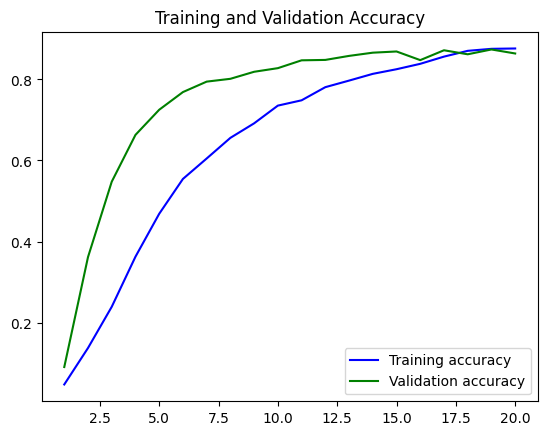

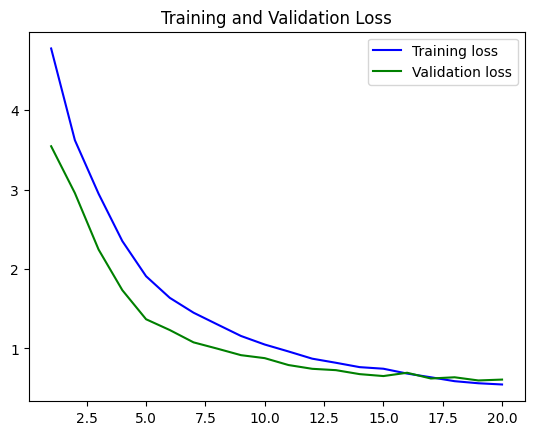

In [ ]:
vgg16_dropout_accuracy = vgg16_dropout_history.history['accuracy']
vgg16_dropout_val_acc = vgg16_dropout_history.history['val_accuracy']
vgg16_dropout_loss = vgg16_dropout_history.history['loss']
vgg16_dropout_val_loss = vgg16_dropout_history.history['val_loss']

epochs = range(1,len(vgg16_dropout_accuracy)+1)

plt.plot(epochs, vgg16_dropout_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, vgg16_dropout_val_acc, 'g', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, vgg16_dropout_loss, 'b', label='Training loss')
plt.plot(epochs, vgg16_dropout_val_loss, 'g', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

**EVALUATION OF BEST MODEL ON TEST SET**

In [ ]:
best_vgg_model = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/DL/Traffic Sign/Epochs7/epochs:020-val_accuracy:0.8775.hdf5')

In [ ]:
# Using flow_from_dataframe to load test data with labels
test_generator = datagen.flow_from_dataframe(
                 dataframe=df,
                 directory=test_path,
                 x_col='Path',              # Column with image file paths
                 y_col='ClassId',           # Column with class labels
                 target_size=(224, 224),
                 batch_size=32,
                 class_mode='categorical',
                 shuffle=False,
                 seed=42,
                 color_mode='rgb')

Found 1000 validated image filenames belonging to 43 classes.


In [ ]:
# Using the best model to predict test images
test_predictions = best_vgg_model.predict(test_generator)

# Converting one-hot encoded labels back to class IDs
predicted_labels = np.argmax(test_predictions, axis=1)

# Obtaining true labels from the test generator
true_labels = test_generator.classes

32/32 [==============================] - 325s 10s/step


Accuracy: 0.8880
Classification Report of Prediction on Test Set:
                                precision    recall  f1-score   support

         Speed limit (20km/h)       0.91      1.00      0.95        10
         Speed limit (30km/h)       0.98      0.84      0.91        63
         Speed limit (50km/h)       0.93      0.98      0.96        57
         Speed limit (60km/h)       0.96      1.00      0.98        27
         Speed limit (70km/h)       1.00      0.98      0.99        44
         Speed limit (80km/h)       0.98      1.00      0.99        64
  End of speed limit (80km/h)       1.00      0.96      0.98        23
        Speed limit (100km/h)       0.90      1.00      0.95        18
        Speed limit (120km/h)       0.80      1.00      0.89        12
                   No passing       1.00      1.00      1.00        29
 No passing veh over 3.5 tons       1.00      0.77      0.87        26
 Right-of-way at intersection       0.78      1.00      0.88         7
         

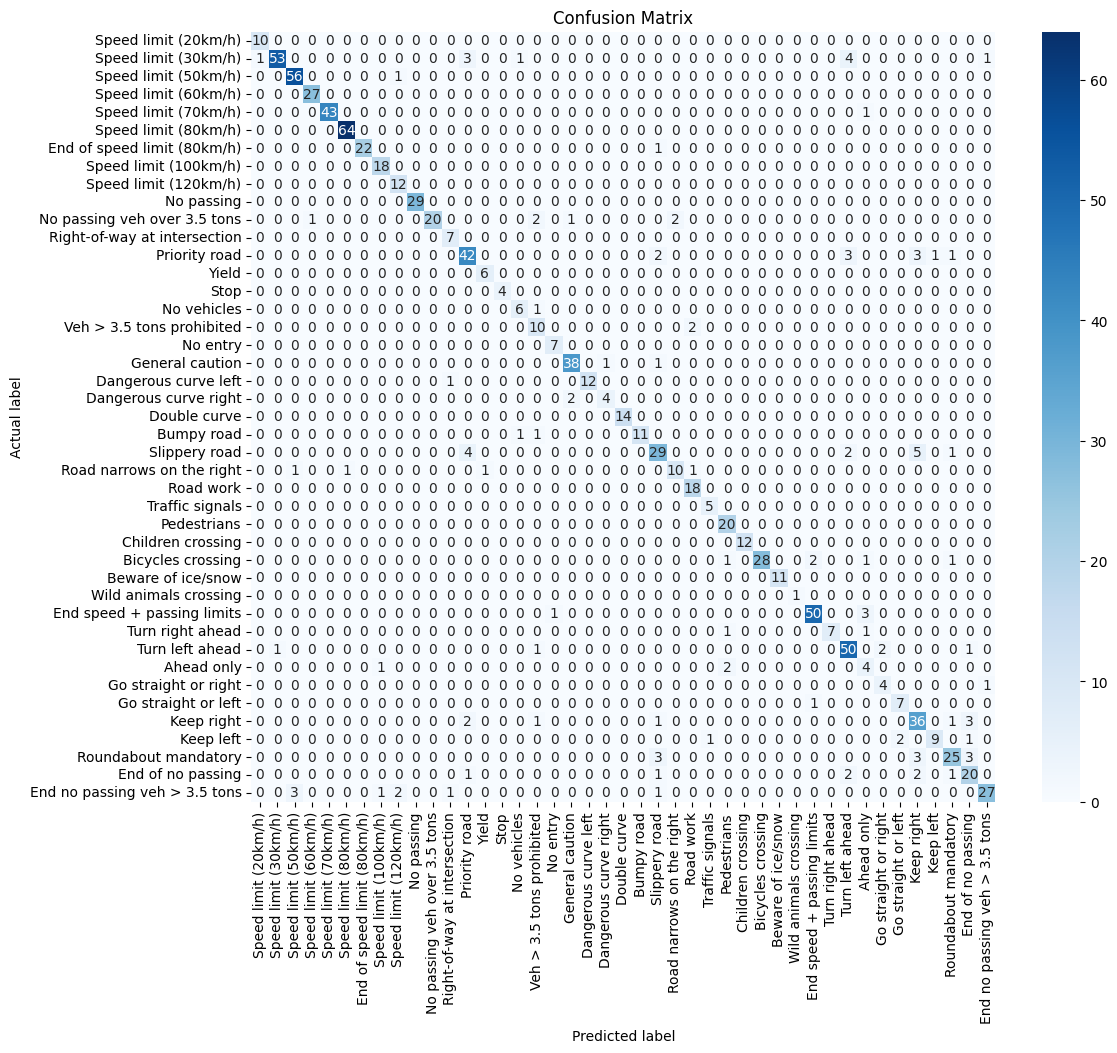

In [ ]:
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculating accuracy score
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy: {accuracy:.4f}')

# Generating a classification report
class_names = list(classes.values())
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print('Classification Report of Prediction on Test Set:\n', report)

# Plotting a confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(12, 10))
sns.heatmap(confusion, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()